In [ ]:
#AI Trainer for the Adjustments Project

In [32]:
#Load input data
import pandas as pd
import numpy as np

#Load data
df=pd.read_csv('SampleData.csv')
df.head(10)

,AdjustmentType,AdjustmentName,AdjustedField,Drawn,Undrawn,PD,CustomerID,CustomerType,AccountType,Approach,RiskCategory,SubDivision,IsDefaulted,CountryCode,NewVal
0,Amend,German Retail Downturn,RiskCategory,124553,870304,0.55,CUST563201,Retail,Other,ADV,Low,HSBC_IR,0,DE,Medium
1,Amend,BREXIT_DEFAULTED,RiskCategory,83665,348195,0.39,CUST450896,Retail,Revolver,ADV,Medium,HSBC_UK,1,GB,High
2,Amend,BREXIT,RiskCategory,391137,61592,0.12,CUST238947,SME,Current,ADV,Low,HSBC_US,0,GB,Medium
3,Amend,Noise_19b,CustomerID,643761,288541,0.39,CUST359147,Retail,Investment,FOU,High,HSBC_US,0,US,CUST665428
4,Amend,Noise_22d,CustomerID,181927,540516,0.69,CUST563201,SME,Mortgage,FOU,Medium,HSBC_US,0,DE,CUST981372
5,Amend,BREXIT,RiskCategory,721774,98526,0.28,CUST103289,Retail,Current,ADV,Low,HSBC_IR,0,GB,Medium
6,Amend,BREXIT,RiskCategory,798232,873463,0.06,CUST450896,Corporate,Credit Card,STD,Low,HSBC_IR,0,GB,Medium
7,Amend,US STD downgrade,RiskCategory,451209,386290,0.35,CUST981372,Retail,Savings,STD,Low,HSBC_CORP,0,US,High
8,Amend,German Retail Downturn,RiskCategory,409180,112872,0.93,CUST238947,Retail,Insurance,STD,Low,HSBC_UK,0,DE,Medium
9,Amend,German Retail Downturn,RiskCategory,967766,632222,0.64,CUST192654,Retail,Savings,STD,High,HSBC_US,0,DE,Medium


In [33]:
#Stage 1: Split the data into onehot encoded and non-onehot encoded dataframes - turn NewVal into token number

#Build list of all string columns in the dataframe
string_columns=[]
other_columns=[]
for col in df.columns:
    if df[col].dtype=='object' and col!="NewVal":
        string_columns.append(col)
    else:
        other_columns.append(col)

#Detach other_columns from df
df_other=df[other_columns]
df.drop(other_columns, axis=1, inplace=True)

#Create a dictionary to map the output labels to numbers
#Turn output labels into numbers
outputLabels=df_other["NewVal"].unique()
outputLabels=outputLabels.copy()
outputLabels.sort()
outputLabelsDict={}
for i in range(len(outputLabels)):
    outputLabelsDict[outputLabels[i]]=i

#Create inverse dictionary
outputLabelsInvDict={}
for i in range(len(outputLabels)):
    outputLabelsInvDict[i]=outputLabels[i]

#Turn NewVal into numbers
df_other["NewVal"]=df_other["NewVal"].map(outputLabelsDict)

outputLabelsDict

C:\Users\simon\AppData\Local\Temp\ipykernel_24944\1899315636.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other["NewVal"]=df_other["NewVal"].map(outputLabelsDict)


{'0': 0,
 '0.75': 1,
 '1': 2,
 'ADV': 3,
 'CUST103289': 4,
 'CUST192654': 5,
 'CUST238947': 6,
 'CUST359147': 7,
 'CUST450896': 8,
 'CUST563201': 9,
 'CUST665428': 10,
 'CUST712035': 11,
 'CUST804231': 12,
 'CUST981372': 13,
 'Corporate': 14,
 'Credit Card': 15,
 'Current': 16,
 'DE': 17,
 'Debt Recovery': 18,
 'FOU': 19,
 'GB': 20,
 'HSBC_AP': 21,
 'HSBC_CORP': 22,
 'HSBC_DEBTS': 23,
 'HSBC_IR': 24,
 'HSBC_UK': 25,
 'HSBC_US': 26,
 'High': 27,
 'Insurance': 28,
 'Investment': 29,
 'Loan': 30,
 'Low': 31,
 'Medium': 32,
 'Mortgage': 33,
 'Other': 34,
 'Retail': 35,
 'Revolver': 36,
 'SME': 37,
 'STD': 38,
 'Savings': 39,
 'US': 40}

In [39]:
#Test code using SKLearn OneHotEncoder***********************************************************
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_array = encoder.fit_transform(df)
encoded_array

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names(df.columns))
encoded_df
#df
#encoded_df.columns.to_list()

#encoder.get_feature_names(df.columns)

#encoded_df.to_csv("encoded_df.csv")

# # Function to find the encoded column name
# def find_encoded_column_name(encoder, column_index, field_value):
#     column_categories = encoder.categories_[column_index]
#     value_index = np.where(column_categories == field_value)[0][0]
#     encoded_column_name = f'x{column_index}_{value_index}_{field_value}'
#     return encoded_column_name

# # Example: Find the encoded column name for 'red' in the second column (index 1)
# encoded_column_name = find_encoded_column_name(encoder, 1, 'red')
# print(encoded_column_name)  # Output: x1_1_red



#original_df

c:\pythonenvs\pyTorchCUDA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,AdjustmentType_Amend,AdjustmentName_BREXIT,AdjustmentName_BREXIT_DEFAULTED,AdjustmentName_Defaulting Cleanup,AdjustmentName_German Retail Downturn,AdjustmentName_Market Downturn,AdjustmentName_Noise_116z,AdjustmentName_Noise_128x,AdjustmentName_Noise_19b,AdjustmentName_Noise_22d,...,RiskCategory_Medium,SubDivision_HSBC_AP,SubDivision_HSBC_CORP,SubDivision_HSBC_DEBTS,SubDivision_HSBC_IR,SubDivision_HSBC_UK,SubDivision_HSBC_US,CountryCode_DE,CountryCode_GB,CountryCode_US
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
19996,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
19997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
19998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [40]:
#Detach the NewVal column and onehot encode it!
labels=df_other["NewVal"]
df_other=df_other.drop(columns=["NewVal"])

labelF=pd.get_dummies(labels)
labelF


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#Stage 2: Normalize all numeric values
#Normalize the dataframe

#Statistical sampling
#Get min max for a column
def GetMinMax(col):
    return col.min(), col.max()

def Normalize(col, min, max):
    return (col-min)/(max-min)*2-1

#Define non-string fields
fieldHandling={}
fieldHandling.update({"Drawn":"Normalize"})
fieldHandling.update({"Undrawn":"Normalize"})
fieldHandling.update({"PD":"Clip"})

#Get metrics for non-string fields
fieldMetrics={}
for col in fieldHandling.keys():
    fieldMetrics.update({col:GetMinMax(df_other[col])})

fieldHandling

#Copy df_other, normalize the copy
df_other_normalized=df_other.copy()
for col in fieldHandling.keys():
    if fieldHandling[col]=="Normalize":
        df_other_normalized[col]=Normalize(df_other_normalized[col], fieldMetrics[col][0], fieldMetrics[col][1])
    elif fieldHandling[col]=="Clip":
        df_other_normalized[col]=df_other_normalized[col].clip(0,1)

#df_other_normalized


#build the final dataframe
df_normalized=pd.concat([df_other_normalized, encoded_df], axis=1)
df_normalized


,Drawn,Undrawn,PD,IsDefaulted,AdjustmentType_Amend,AdjustmentName_BREXIT,AdjustmentName_BREXIT_DEFAULTED,AdjustmentName_Defaulting Cleanup,AdjustmentName_German Retail Downturn,AdjustmentName_Market Downturn,...,RiskCategory_Medium,SubDivision_HSBC_AP,SubDivision_HSBC_CORP,SubDivision_HSBC_DEBTS,SubDivision_HSBC_IR,SubDivision_HSBC_UK,SubDivision_HSBC_US,CountryCode_DE,CountryCode_GB,CountryCode_US
0,-0.750964,0.740646,0.55,0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-0.832744,-0.303636,0.39,1,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.217770,-0.876876,0.12,0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.287502,-0.422951,0.39,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.636211,0.081030,0.69,0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.911192,-0.994288,0.61,1,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
19996,-0.297744,-0.886897,0.29,1,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
19997,-0.496072,0.536902,0.12,0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
19998,-0.955144,0.469432,0.97,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [50]:
print(len(df_normalized))
print(len(labelF))

20000
20000


In [51]:
#Turn the pandas dataframe into a numpy array, split out the label and then break into sets
import tensorflow as tf

#turn df_normalized into a normal array
data=df_normalized.values

#Get all columns except the output column
X=data[:,1:]

#Get the output column
data=labelF.values
y=data[:,:]


from sklearn.model_selection import train_test_split
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)




In [52]:
print(len(X))
print(len(y))

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


20000
20000
16000
4000
16000
4000


In [53]:
#Build model parameterized so we can do a grid-search on hyperparameters
from keras.wrappers.scikit_learn import KerasClassifier

def CreateModel(neurons=200, dropout=0.2,layers=3):

    #------------------PARAMETERS------------------
    num_classes=len(labelF.columns)  #Fix this so it gets inferred from the data in future
    #totalepochs=80

    #Simple feed-forward model. No U-nets or anything fancy
    ann = tf.keras.models.Sequential()

    #Variable number of layers
    for i in range(layers):
        ann.add(tf.keras.layers.Dense(units=neurons, activation='relu'))
        ann.add(tf.keras.layers.Dropout(dropout))
    
    ann.add(tf.keras.layers.Dense(units=num_classes, activation='sigmoid'))

    # ann.add(tf.keras.layers.Flatten())
    # ann.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


    #Compile!
    ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    ann.build(input_shape=(None, X_train.shape[1]))
    #ann.summary()
    return ann

model = KerasClassifier(build_fn=CreateModel, verbose=0)

param_grid = {
    'epochs': [1,2,4,8,16],
    'neurons': [50, 100, 200],
    "dropout":[0.05,0.1,0.2,0.4],
    "layers":[1,2,4]
}

C:\Users\simon\AppData\Local\Temp\ipykernel_24944\253505356.py:30: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=CreateModel, verbose=0)


In [54]:
#Train the MODEL!!!!!
#model.fit(X_train, y_train, batch_size = 32, epochs = 80)

#Perform hyperparameter search using GPU
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)
# print("Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

#Best score: 0.819375 using {'dropout': 0.05, 'epochs': 8, 'layers': 1, 'neurons': 200}
model=CreateModel(neurons=200, dropout=0.05,layers=1)
model.fit(X_train, y_train, batch_size = 32, epochs = 8)



Epoch 1/8
500/500 [==============================] - 1s 765us/step - loss: 0.0663 - accuracy: 0.7114
Epoch 2/8
500/500 [==============================] - 0s 738us/step - loss: 0.0185 - accuracy: 0.8177
Epoch 3/8
500/500 [==============================] - 0s 742us/step - loss: 0.0153 - accuracy: 0.8237
Epoch 4/8
500/500 [==============================] - 0s 730us/step - loss: 0.0146 - accuracy: 0.8281
Epoch 5/8
500/500 [==============================] - 0s 733us/step - loss: 0.0143 - accuracy: 0.8331
Epoch 6/8
500/500 [==============================] - 0s 732us/step - loss: 0.0142 - accuracy: 0.8354
Epoch 7/8
500/500 [==============================] - 0s 737us/step - loss: 0.0140 - accuracy: 0.8356
Epoch 8/8
500/500 [==============================] - 0s 743us/step - loss: 0.0139 - accuracy: 0.8409


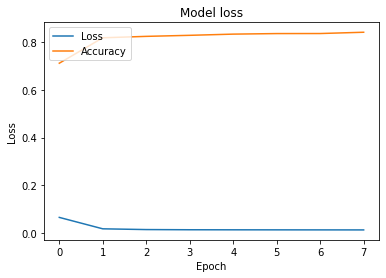

In [55]:
#Plot the loss and accuracy
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper left')
plt.show()



In [56]:
#Validate the model against the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

#Get the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


125/125 [==============================] - 0s 480us/step


0.76925

In [18]:
#Weightwatcher
import weightwatcher as ww
watcher = ww.WeightWatcher(model=model)
results = watcher.analyze()
results



,layer_id,name,D,M,N,Q,alpha,alpha_weighted,entropy,has_esd,...,rf,sigma,spectral_norm,stable_rank,status,sv_max,warning,weak_rank_loss,xmax,xmin
0,0,dense_2,0.085853,64,200,3.125000,1.778470,3.378052,1.038621,True,...,1,0.112363,79.3125,5.554688,success,8.90625,over-trained,0,79.3125,1.09375
1,2,dense_3,0.096220,41,200,4.878049,2.673141,4.881615,0.993600,True,...,1,0.504471,67.0625,3.996094,success,8.18750,,0,67.0625,8.31250


In [169]:
#Save model (Tensorflow)
model.save('Models/AdjustmentValues/model.h5')

outputLabelsInvDict

# #Save the inverse labels dictionary as json to model folder
import json
with open('Models/AdjustmentValues/softmaxlkp.json', 'w') as fp:
    json.dump(outputLabelsInvDict, fp)

#Writing df_normalized column names to JSON
import json
with open('Models/AdjustmentValues/in_columnnames.json', 'w') as fp:
    json.dump(list(df_normalized.columns), fp)

